# CALIDAD DE DATOS

<h1>Archivo : 6_2_internet_accesos_por_velocidad_provincias.csv</h1> 

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings

In [90]:
# Ignorar todos los warnings
warnings.filterwarnings("ignore")

Cargamos el archivo

In [91]:
# cargamos el archivo
df = pd.read_csv(r'..\CSV\6_2_internet_accesos_por_velocidad_provincias.csv', sep=',', encoding='UTF-8')

Analizamos los datos

In [92]:
# vemos la primer linea para identificar columna y datos
df.head(1)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28.934,23.347,259.866,281.55,244.555,98.67,3.760.109,97.634,4.794.665


In [93]:
# obtenemos la info del datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   HASTA 512 kbps       864 non-null    float64
 4   + 512 Kbps - 1 Mbps  864 non-null    float64
 5   + 1 Mbps - 6 Mbps    864 non-null    object 
 6   + 6 Mbps - 10 Mbps   864 non-null    float64
 7   + 10 Mbps - 20 Mbps  864 non-null    float64
 8   + 20 Mbps - 30 Mbps  864 non-null    float64
 9   + 30 Mbps            864 non-null    object 
 10  OTROS                858 non-null    float64
 11  Total                864 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 81.1+ KB


<h2>Normalizacion de los datos</h2>

Normalizamos el nombre de las columnas

In [94]:
df.columns

Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

In [95]:
# Convertir los nombres de las columnas a minúsculas
df.columns = df.columns.str.lower()

In [96]:
# Reemplazar los espacios por guiones bajos en los nombres de las columnas
df.columns = df.columns.str.replace(' ', '_')

Renombramos para unificar nombres con demas tablas relacionadas

In [97]:
# Listas de nombres originales y nuevos nombres
nombres_originales = ['hasta_512_kbps','+_512_kbps_-_1_mbps', '+_1_mbps_-_6_mbps', '+_6_mbps_-_10_mbps',
       '+_10_mbps_-_20_mbps', '+_20_mbps_-_30_mbps', '+_30_mbps']
nuevos_nombres = ['hasta_512_kbps', 'entre_512_kbps_y_1_mbps','entre_1_mbps_y_6_mbps', 'entre_6_mbps_y_10_mbps',
       'entre_10_mbps_y_20_mbps', 'entre_20_mbps_y_30_mbps', 'más_de_30_mbps']

# Usar zip para combinar las listas de nombres originales y nuevos
nombres_a_renombrar = dict(zip(nombres_originales, nuevos_nombres))

# Utilizar el método rename para cambiar los nombres de las columnas
df.rename(columns=nombres_a_renombrar, inplace=True)

In [98]:
df.head(3)

,año,trimestre,provincia,hasta_512_kbps,entre_512_kbps_y_1_mbps,entre_1_mbps_y_6_mbps,entre_6_mbps_y_10_mbps,entre_10_mbps_y_20_mbps,entre_20_mbps_y_30_mbps,más_de_30_mbps,otros,total
0,2022,4,Buenos Aires,28.934,23.347,259.866,281.550,244.555,98.670,3.760.109,97.634,4.794.665
1,2022,4,Capital Federal,516.000,5.096,31.320,64.653,36.336,8.116,1.299.117,106.772,1.551.926
2,2022,4,Catamarca,71.000,315.000,2.716,5.028,4.638,3.122,52.739,2.280,70.909


Normalizamos los tipos de datos a string

In [99]:
# Definir los nuevos tipos de dato en un diccionario
nuevos_tipos = {'hasta_512_kbps': str, 'entre_512_kbps_y_1_mbps': str, 'entre_1_mbps_y_6_mbps': str, 'entre_6_mbps_y_10_mbps': str, 'entre_10_mbps_y_20_mbps': str, 'entre_20_mbps_y_30_mbps': str,'más_de_30_mbps': str , 'otros': str, 'total': str}

# Cambiar el tipo de dato de las columnas al mismo tiempo
df = df.astype(nuevos_tipos)

- Realizamos la extraccion del "."

In [100]:
# Listar las columnas en las que deseas realizar el reemplazo
columnas_a_reemplazar = ['hasta_512_kbps', 'entre_512_kbps_y_1_mbps',
       'entre_1_mbps_y_6_mbps', 'entre_6_mbps_y_10_mbps',
       'entre_10_mbps_y_20_mbps', 'entre_20_mbps_y_30_mbps', 'más_de_30_mbps',
       'otros', 'total']

# Realizar el reemplazo en todas las columnas
for columna in columnas_a_reemplazar:
    df[columna] = df[columna].str.replace('.', '')

Normalizamos los tipos de datos a int

In [101]:
# Convertir la columna 'otros' a tipo float y manejar los valores no válidos
df['otros'] = pd.to_numeric(df['otros'], errors='coerce')

In [102]:
# Definir los nuevos tipos de dato en un diccionario
nuevos_tipos = {'hasta_512_kbps': int, 'entre_512_kbps_y_1_mbps': int, 'entre_1_mbps_y_6_mbps': int, 'entre_6_mbps_y_10_mbps': int, 'entre_10_mbps_y_20_mbps': int, 'entre_20_mbps_y_30_mbps': int,'más_de_30_mbps': int , 'total': int}

# Cambiar el tipo de dato de las columnas al mismo tiempo
df = df.astype(nuevos_tipos)

Verificamos que los valores de la columna total NO se corresponde a la suma de las columnas de los rangos de velocidades. 

In [103]:
#creamos una columna con la suma de todos los valores excluido total
df['total1'] = df['hasta_512_kbps'] + df['entre_512_kbps_y_1_mbps']+ df['entre_1_mbps_y_6_mbps']+ df['entre_6_mbps_y_10_mbps']+ df['entre_10_mbps_y_20_mbps']+ df['entre_20_mbps_y_30_mbps'] + df['más_de_30_mbps'] + df['otros']
# creamos una columna con el valor de la diferencia entre el total del datasets y el creado para control
df['diferencia'] = df['total'] - df['total1']
#Verificamos que no existen diferencias
df['diferencia'].unique()

array([ 3.42198e+05, -4.64400e+03, -1.42200e+03, -1.10880e+04,
        1.32120e+04,  7.17660e+04,  2.79000e+03,  4.52700e+04,
       -1.20330e+04,  4.19130e+04, -6.12000e+02, -2.80800e+03,
       -9.27000e+02,  1.04310e+04,  4.13100e+03, -9.99000e+02,
       -2.07900e+03,  2.88360e+04, -6.15600e+03,  5.67000e+03,
        1.87272e+05, -1.64520e+04, -8.31600e+03, -3.51000e+02,
        1.11771e+05, -4.65300e+03, -4.09500e+03, -1.30320e+04,
        2.68650e+04, -8.91000e+02, -6.03000e+02, -9.63000e+02,
       -1.40130e+04, -5.19300e+03, -6.36300e+03,  7.05600e+03,
        1.82880e+04,  1.50750e+04,  3.15000e+02,  5.88600e+03,
       -3.30300e+03, -6.29100e+03, -4.21200e+03, -1.69200e+04,
       -7.67700e+03, -2.87100e+03,  0.00000e+00,  7.29000e+02,
       -4.35600e+03, -4.14900e+03,  2.98800e+04, -9.46800e+03,
        8.74800e+03,  1.10700e+04, -3.21300e+03,  2.61900e+03,
       -1.01970e+04,  2.08440e+04,  3.51000e+02, -2.16000e+02,
       -3.29400e+03, -6.26400e+03, -1.66770e+04, -2.880

Eliminamos la columna total por ser recurrente a la suma de todas las otras columnas<br>
Los resultados que expresa por registro la columna estan erroneos respecto a la suma de los mismos<br>
Eliminamos tambian las columnas creadas para el analisis

In [104]:
# Eliminar las columnas innecesarias
columnas_a_eliminar = ['total', 'diferencia', 'total']
df = df.drop(columns=columnas_a_eliminar)

In [105]:
df.describe()

,año,trimestre,hasta_512_kbps,entre_512_kbps_y_1_mbps,entre_1_mbps_y_6_mbps,entre_6_mbps_y_10_mbps,entre_10_mbps_y_20_mbps,entre_20_mbps_y_30_mbps,más_de_30_mbps,otros,total1
count,864.000000,864.000000,864.000000,864.000000,8.640000e+02,864.000000,864.000000,864.000000,8.640000e+02,858.000000,8.580000e+02
mean,2018.000000,2.500000,2886.682870,10221.003472,1.480209e+05,33547.171296,34436.415509,19182.944444,8.555756e+04,5208.797203,3.391267e+05
std,2.583484,1.118682,10789.912094,21320.768124,3.438435e+05,60076.453978,86542.136272,69428.537032,3.635417e+05,12927.225226,7.217355e+05
min,2014.000000,1.000000,60.000000,0.000000,2.531000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.265600e+04
25%,2016.000000,1.750000,337.500000,1372.000000,2.744150e+04,3041.000000,2127.500000,220.000000,8.000000e+00,0.000000,5.641950e+04
50%,2018.000000,2.500000,1045.000000,3727.000000,4.783750e+04,8459.000000,7868.500000,2341.500000,1.019000e+03,0.000000,1.059780e+05
75%,2020.000000,3.250000,2553.250000,8324.000000,8.639200e+04,29956.000000,24457.250000,9284.000000,2.247475e+04,5729.750000,1.785375e+05
max,2022.000000,4.000000,199768.000000,171244.000000,2.299705e+06,403575.000000,886678.000000,949093.000000,3.760109e+06,120464.000000,4.667183e+06


Verificamos la existencia de registros duplicados

In [106]:
# verificamos la existencia de registros duplicados
duplicados_df = df[df.duplicated()]
duplicados_df

,año,trimestre,provincia,hasta_512_kbps,entre_512_kbps_y_1_mbps,entre_1_mbps_y_6_mbps,entre_6_mbps_y_10_mbps,entre_10_mbps_y_20_mbps,entre_20_mbps_y_30_mbps,más_de_30_mbps,otros,total1


Verificamos la existencia de valores nulos

In [107]:
# Buscar los valores NaN en la columna 'mi_columna'
valores_nulos = df.isnull().sum()
# Contar valores nulos por columna
valores_nulos

año                        0
trimestre                  0
provincia                  0
hasta_512_kbps             0
entre_512_kbps_y_1_mbps    0
entre_1_mbps_y_6_mbps      0
entre_6_mbps_y_10_mbps     0
entre_10_mbps_y_20_mbps    0
entre_20_mbps_y_30_mbps    0
más_de_30_mbps             0
otros                      6
total1                     6
dtype: int64

In [108]:
# Crear una nueva columna "fecha" combinando las columnas "dia", "trimestre" y "año"
df['fecha'] = pd.to_datetime(df['año'].astype(str) + '-' + (df['trimestre']*3).astype(str) + '-' + '1', format='%Y-%m-%d')

<h2>Determinacion de valores outliers</h2>

<h3>Creamos las siguientes funciones para agilizar el analisis:</h3>


- ***graficar_box*** :          para hacer un grafico boxplot de las columnas indicadas<br>
- ***graficar_lin*** :          para hacer un grafico de lineas de las columnas indicadas<br>
- ***identificar_outliers***.   para realizar el calculo matematico de determinacion de valores outliers<br>
- ***reemplazar_outliers*** :   para realizar el reemplazo de/los valores aoutliers por la media de la columna


In [109]:
def graficar_box(data, columna):
    

    # Crear y mostrar boxplots solo para las columnas de interés
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=data[columna], orient='h')
    plt.title('Visualización de valores atípicos')
    plt.show()
    return

In [110]:
def graficar_lin(data, columna):
    # Graficar la variable en un gráfico de barras en función del tiempo
    plt.figure(figsize=(5, 3))
    plt.plot(data['fecha'], data[columna], label= columna, marker='o', linestyle='-', color='blue')

    plt.title('Gráfico de Barras de Variable en Función del Tiempo')
    plt.xlabel('fecha')
    plt.ylabel('Velocidades de conexion')
    plt.grid(True)
    plt.legend()

    # Rotar las etiquetas del eje x para una mejor legibilidad
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()
    return

In [111]:
def identificar_outliers(data, columna):
    """
    Identifica valores atípicos (outliers) en una columna específica de un DataFrame.

    Parameters:
        - data: DataFrame que contiene los datos.
        - columna: Nombre de la columna a verificar para outliers.

    Returns:
        - outliers: DataFrame con los valores atípicos encontrados.
    """

    # Calcular la media y la desviación estándar de la columna
    mean = data[columna].mean()
    std_dev = data[columna].std()

    # Definir un umbral (por ejemplo, 3 veces la desviación estándar)
    threshold = 3 * std_dev

    # Identificar valores que superen el umbral y almacenarlos en una lista
    outliers = data[(data[columna] > (mean + threshold)) | (data[columna] < (mean - threshold))][columna].tolist()


    return outliers

In [112]:
def reemplazar_outliers(data, columna, lista):
    # Calcular la media'
    media = df[columna].mean()
    # Buscar los valores y asignarles el valor promedio si se encuentran
    for valor in lista:
        fila_indice = data.index[data[columna] == valor].tolist()
        if fila_indice:
            data.loc[fila_indice, columna] = media
    return

Realizamos el analisis del datasets completo

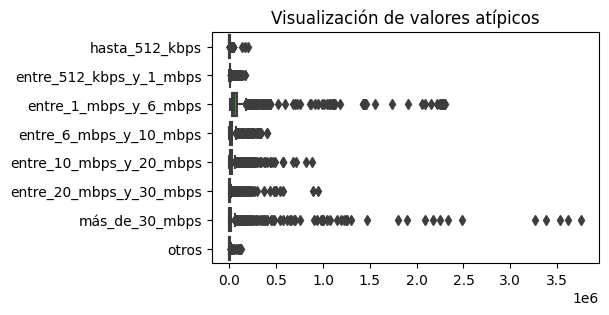

In [113]:
columnas_interesantes = ['hasta_512_kbps', 'entre_512_kbps_y_1_mbps','entre_1_mbps_y_6_mbps', 'entre_6_mbps_y_10_mbps',
       'entre_10_mbps_y_20_mbps', 'entre_20_mbps_y_30_mbps', 'más_de_30_mbps','otros']
graficar_box(df, columnas_interesantes)

<h2> ******************************************************************************************************************************</h2>

<h3>Analisis y Tratamiento de valores de columna 'hasta_512_kbps' </h3>

- Identificamos los valores atipicos

In [114]:
lista = identificar_outliers(df, 'hasta_512_kbps')
print(lista)

[37821, 37193, 37192, 36939, 36939, 37542, 37542, 38215, 199768, 162513, 134673]


Realizamos el boxplot

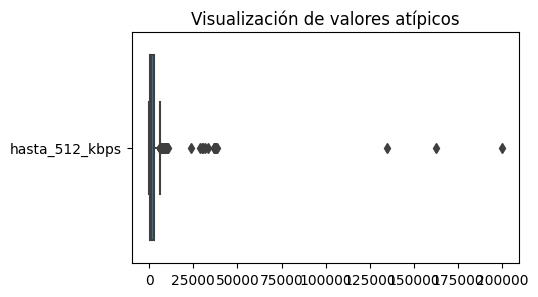

In [115]:
columnas_interesantes = ['hasta_512_kbps']
graficar_box(df, columnas_interesantes)

Realizamos el grafico de linea para analizar la secuencia de los datos

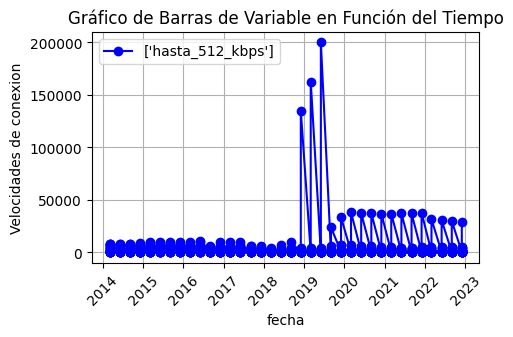

In [116]:
columnas_interesantes = ['hasta_512_kbps']
graficar_lin(df, columnas_interesantes)

Realizamos el reemplazo de los valores outliers por la media de la columna

In [117]:
outliers_a_remmplazar = lista
columnas_interesantes = 'hasta_512_kbps'
reemplazar_outliers(df,columnas_interesantes, outliers_a_remmplazar)

Verificamos el cambio

In [118]:
columnas_interesantes = ['hasta_512_kbps']

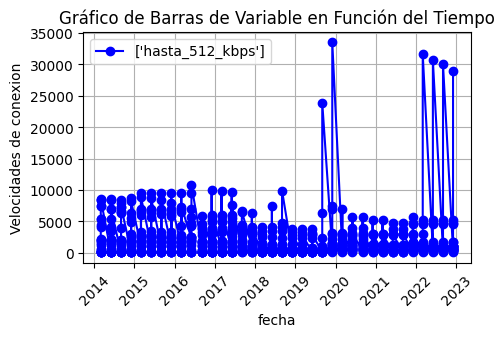

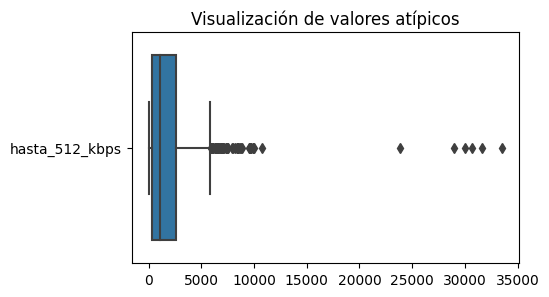

In [119]:
graficar_lin(df, columnas_interesantes)
graficar_box(df, columnas_interesantes)

In [120]:
identificar_outliers(df, 'hasta_512_kbps')

[28934.0, 29985.0, 30639.0, 31591.0, 33489.0, 23892.0]

<h2> ******************************************************************************************************************************</h2>

<h3>Analisis y Tratamiento de valores de columna 'entre_1_mbps_y_6_mbps' </h3>

In [121]:
lista =identificar_outliers(df,'entre_1_mbps_y_6_mbps')
print(lista)

[1432722, 1436259, 1429964, 1422463, 1445733, 1459443, 1445752, 1551194, 1733479, 1910156, 2057698, 2085605, 2148475, 2250898, 2214760, 2253197, 2266948, 2299705, 2267852, 2250445, 2281524, 2288772, 2279875]


Graficamos

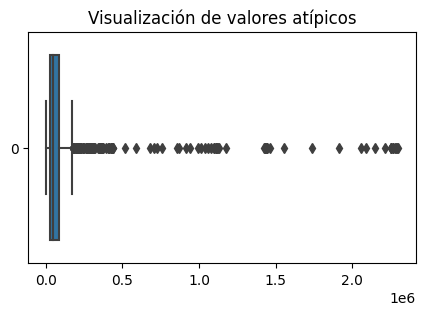

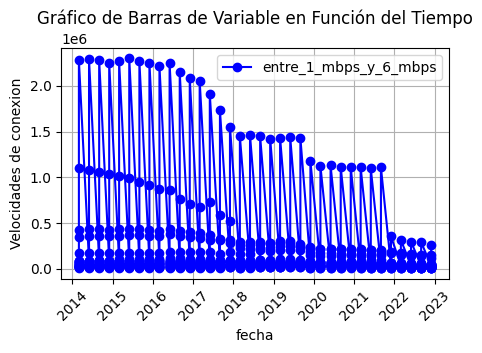

In [122]:
columnas_interesantes = 'entre_1_mbps_y_6_mbps'
graficar_box(df, columnas_interesantes)
graficar_lin(df, columnas_interesantes)

In [123]:
outliers_a_remmplazar = lista
columnas_interesantes = 'entre_1_mbps_y_6_mbps'
reemplazar_outliers(df,columnas_interesantes, outliers_a_remmplazar)

- Verificamos que el valor marcado como atipico resulta ser un valor real y esta acorde a la pendiente de crecimiento de la misma, Por lo que se decide no modificarlo

<h2> ******************************************************************************************************************************</h2>

<h3>Analisis y Tratamiento de valores de columna 'entre_10_mbps_y_20_mbps' </h3>

In [124]:
columnas_interesantes = 'entre_10_mbps_y_20_mbps'
identificar_outliers(df, columnas_interesantes)

[297296,
 438663,
 576428,
 330122,
 577679,
 330496,
 370677,
 816056,
 445345,
 886678,
 487826,
 712513,
 676137,
 573298,
 378571,
 467398,
 399116,
 334723]

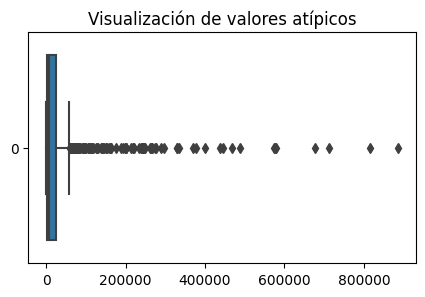

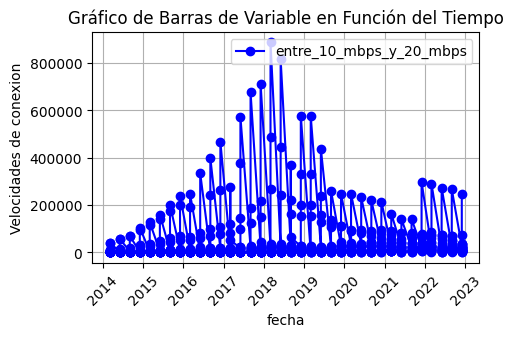

In [125]:
graficar_box(df, columnas_interesantes)
graficar_lin(df, columnas_interesantes)

- Verificamos que el valor marcado como atipico resulta ser un valor real y esta acorde a la pendiente de crecimiento de la misma, Por lo que se decide no modificarlo

<h2> ******************************************************************************************************************************</h2>

<h3>Analisis y Tratamiento de valores de columna 'entre_20_mbps_y_30_mbps' </h3>

In [126]:
columnas_interesantes = 'entre_20_mbps_y_30_mbps'
identificar_outliers(df, columnas_interesantes)

[236897,
 483572,
 258591,
 502275,
 296155,
 576859,
 365713,
 949093,
 437662,
 897964,
 536049,
 264805,
 480237,
 227953]

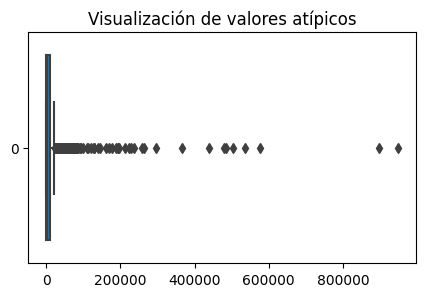

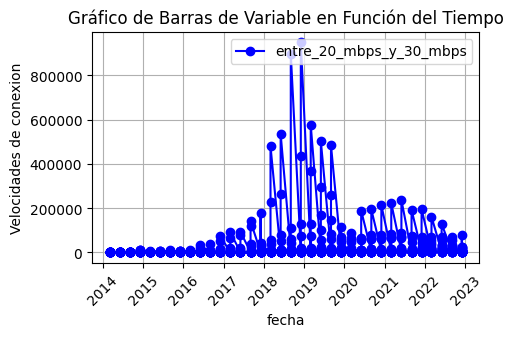

In [127]:
graficar_box(df, columnas_interesantes)
graficar_lin(df, columnas_interesantes)

- Verificamos que el valor marcado como atipico resulta ser un valor real y esta acorde a la pendiente de crecimiento de la misma, Por lo que se decide no modificarlo

<h1>Realizamos un grafico comparativo de todas las variables en funcion del tiempo por provincia

In [128]:
# Obtener los valores únicos de 'columna1' y almacenarlos en una lista
valor_columna = df['provincia'].unique().tolist()

In [129]:
velocidades = ['hasta_512_kbps',
       'entre_512_kbps_y_1_mbps', 'entre_1_mbps_y_6_mbps',
       'entre_6_mbps_y_10_mbps', 'entre_10_mbps_y_20_mbps',
       'entre_20_mbps_y_30_mbps', 'más_de_30_mbps', 'otros']

In [138]:
def graficar_columnas_en_funcion_del_tiempo(df, lista_valores, col_veloc):
    """
    Grafica varias columnas en un gráfico de líneas en función del tiempo.

    Parameters:
        - df: DataFrame que contiene los datos.
        - columnas: Lista de nombres de columnas a graficar.
        - fecha_column: Nombre de la columna que contiene las fechas.

    Returns:
        None
    """
    
    
    
    for valor in lista_valores:
        plt.figure(figsize=(10, 5))
        df_x = df[df['provincia']== valor]
        
        for col in col_veloc:
            color = 'C' + str(col_veloc.index(col))  # Asigna un color a cada columna
            plt.plot(df_x['fecha'], df_x[col], label=f'{col} ({valor})', marker='o', linestyle='-', color=color)
        plt.title('Gráfico de Líneas de Variables en Función del Tiempo')
        plt.xlabel('fecha')
        plt.ylabel(valor)
        plt.grid(True)
        plt.legend(loc='upper right', fontsize='small')
        # Rotar las etiquetas del eje x para una mejor legibilidad
        plt.xticks(rotation=45)
        # Mostrar el gráfico
        plt.show()

    


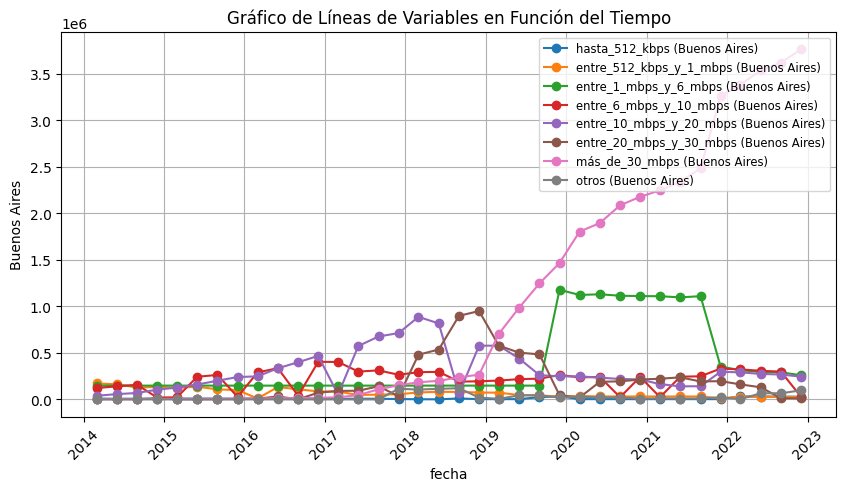

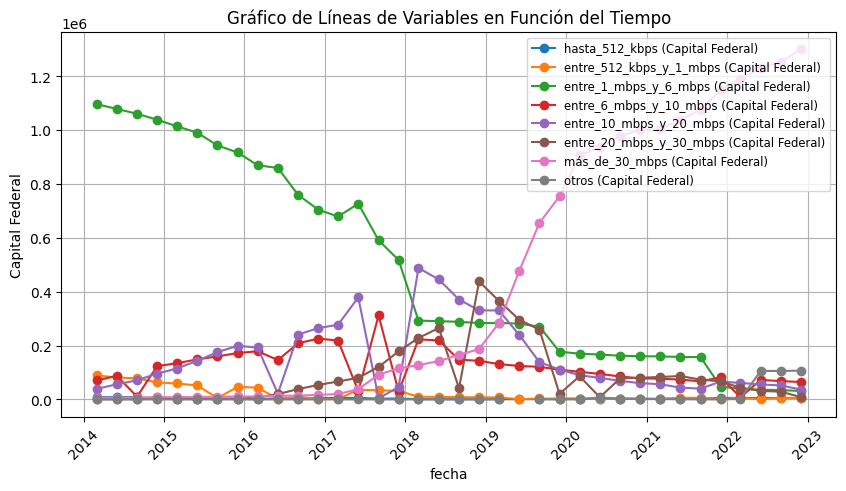

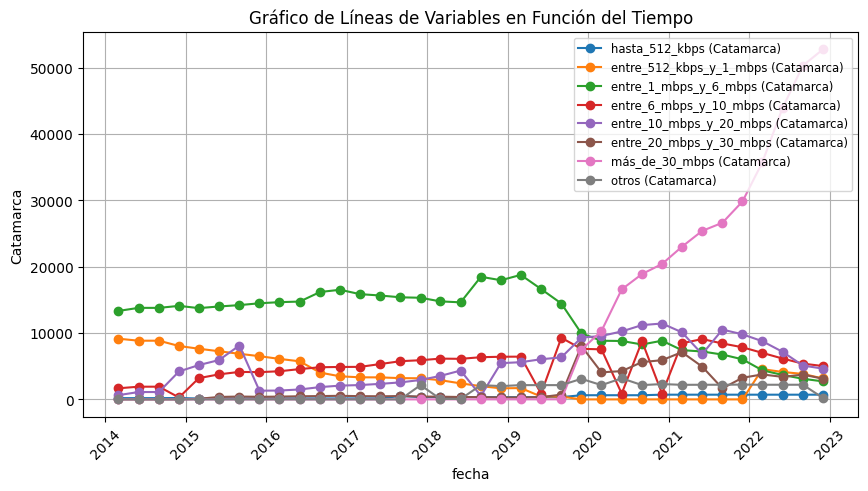

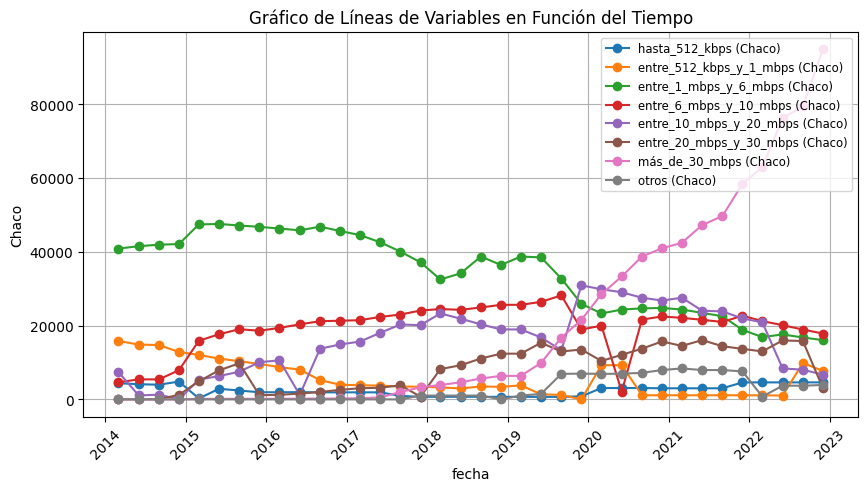

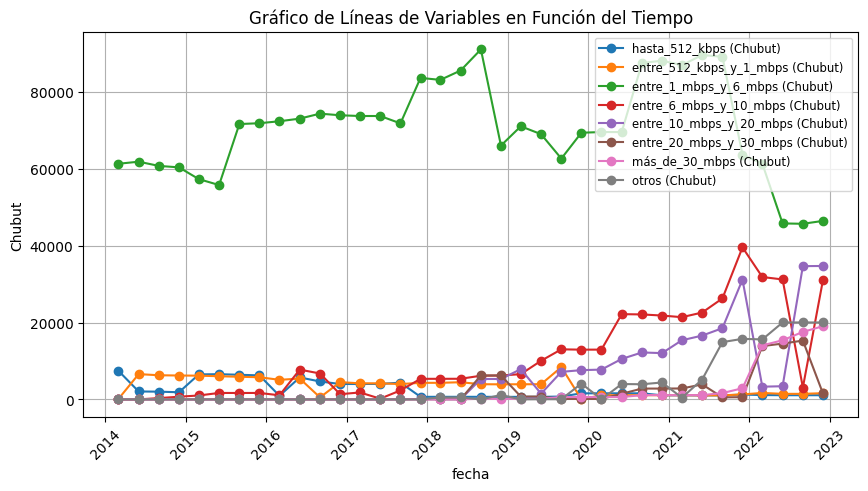

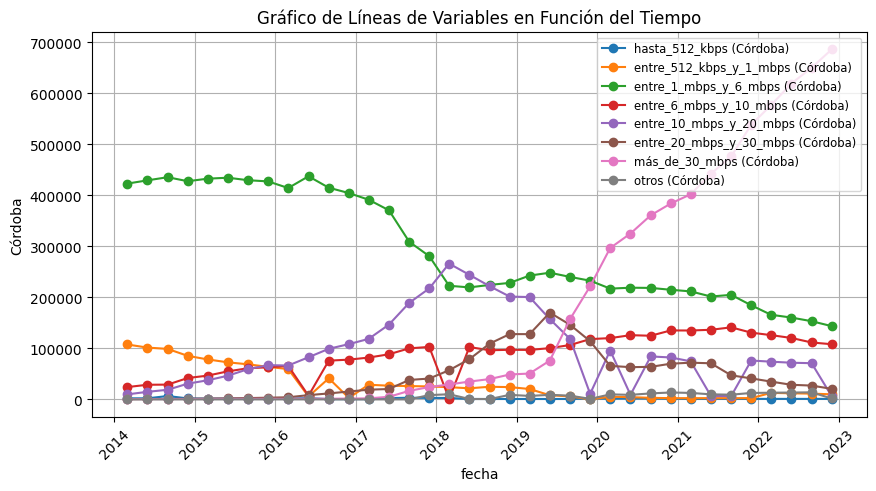

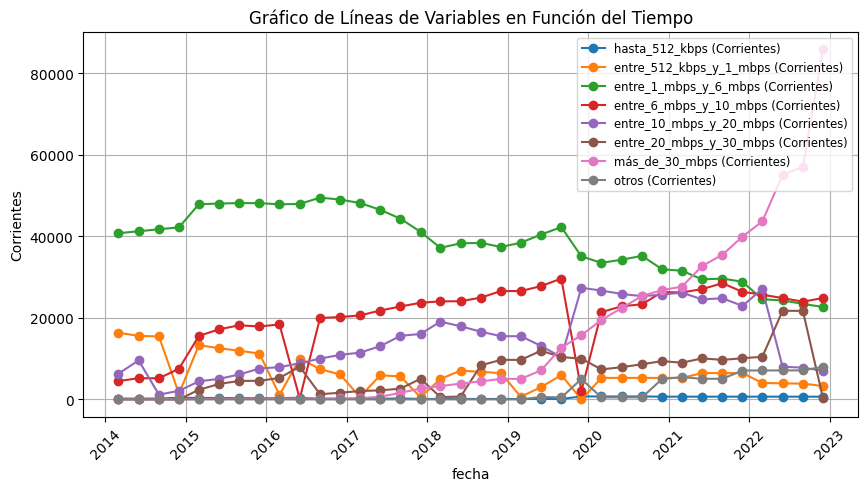

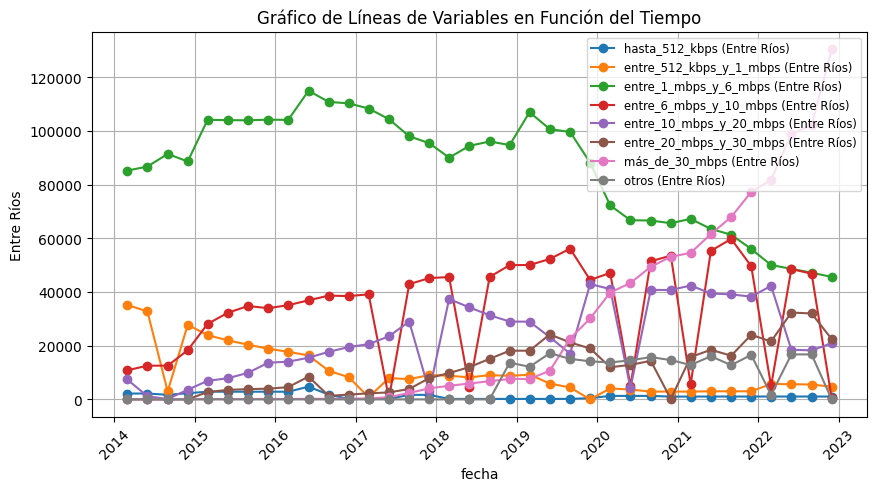

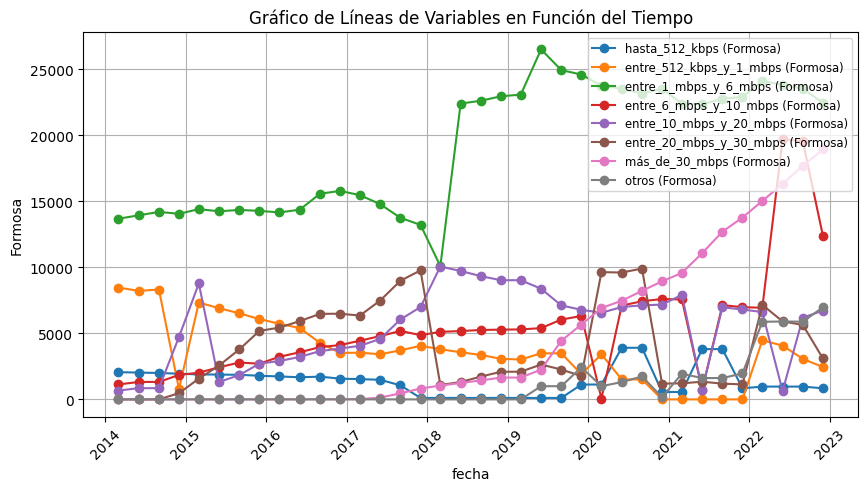

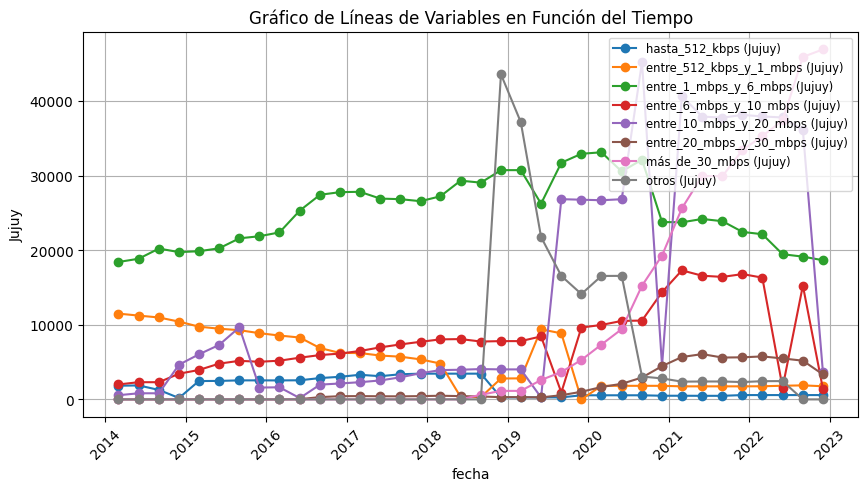

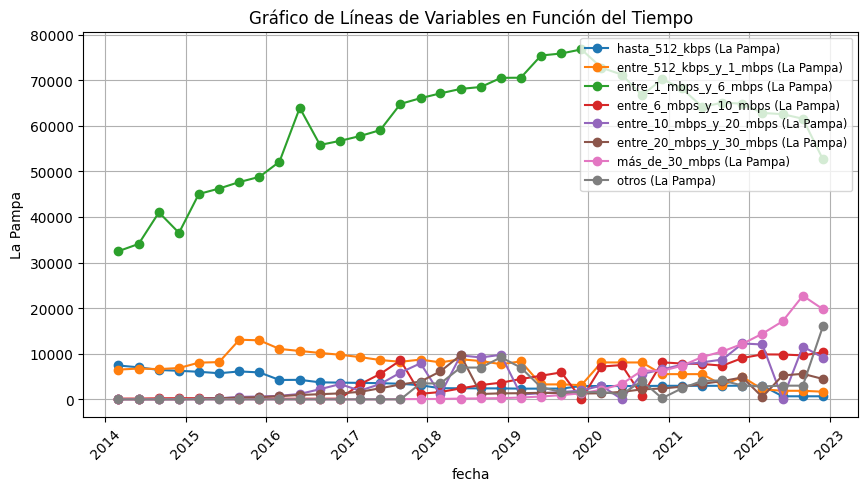

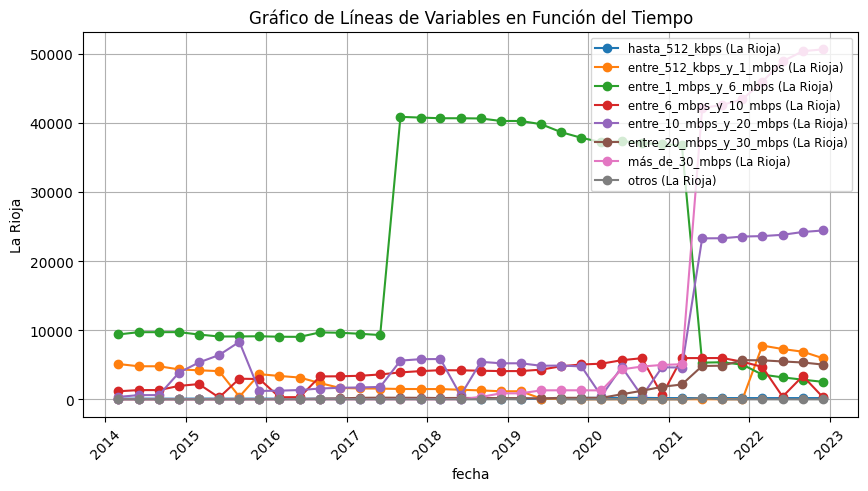

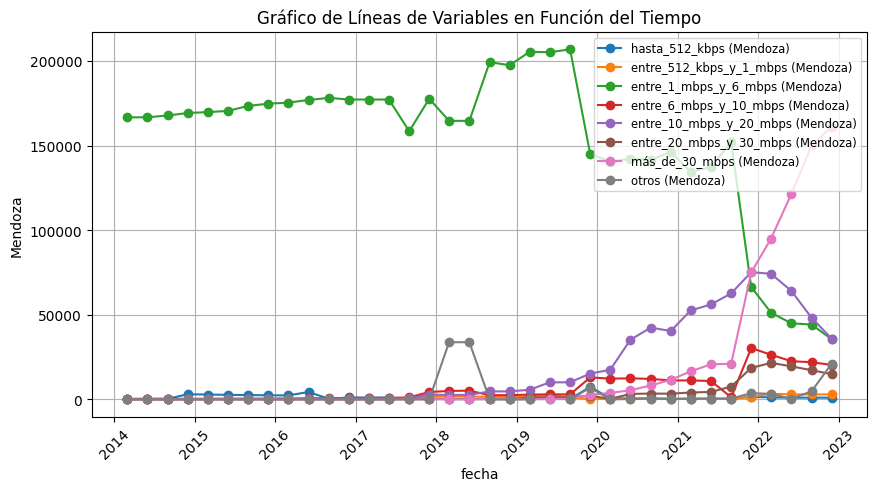

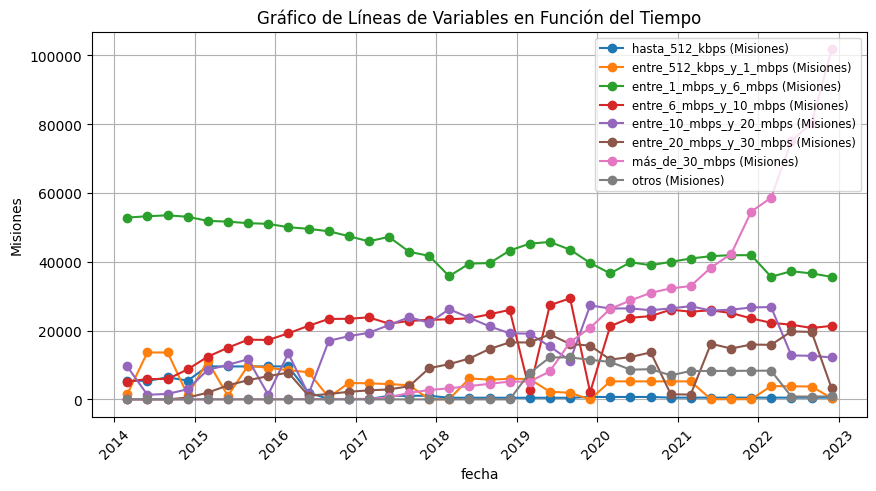

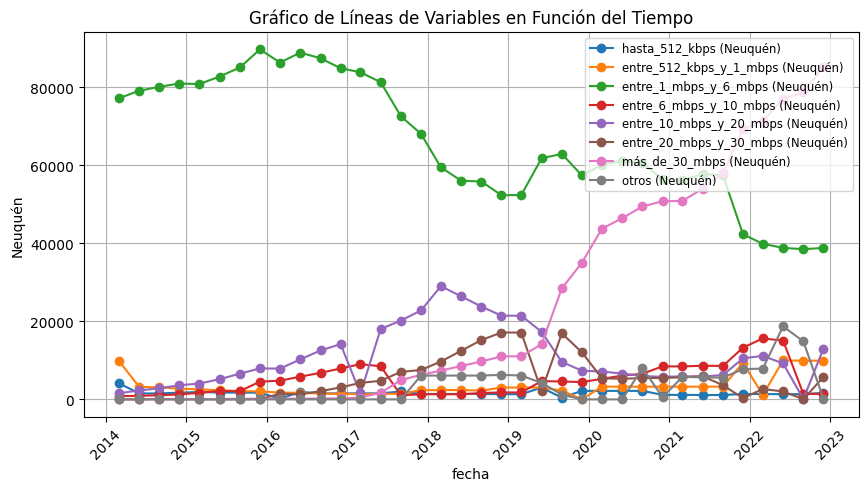

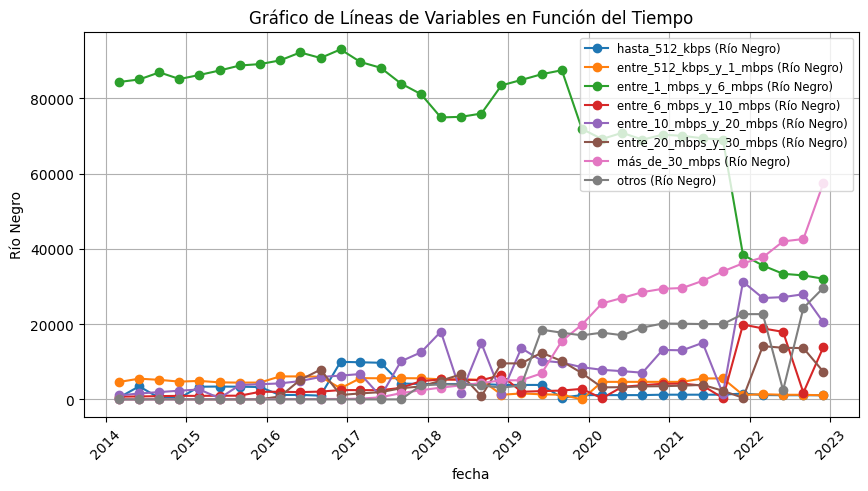

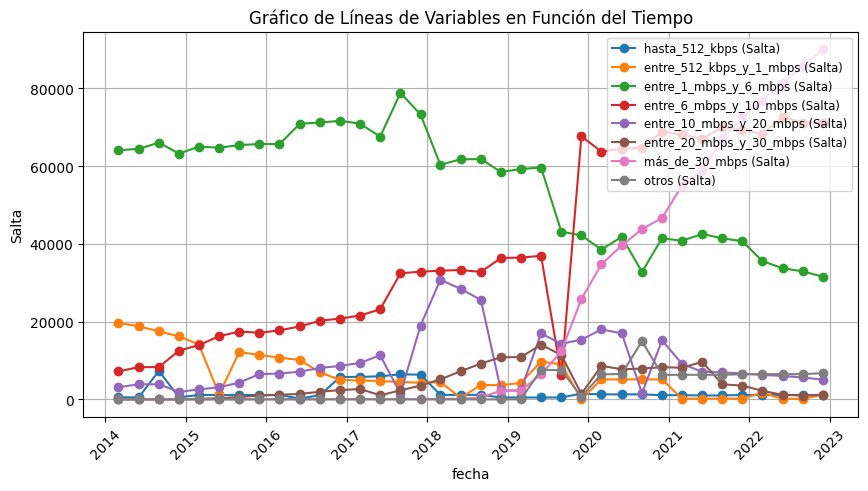

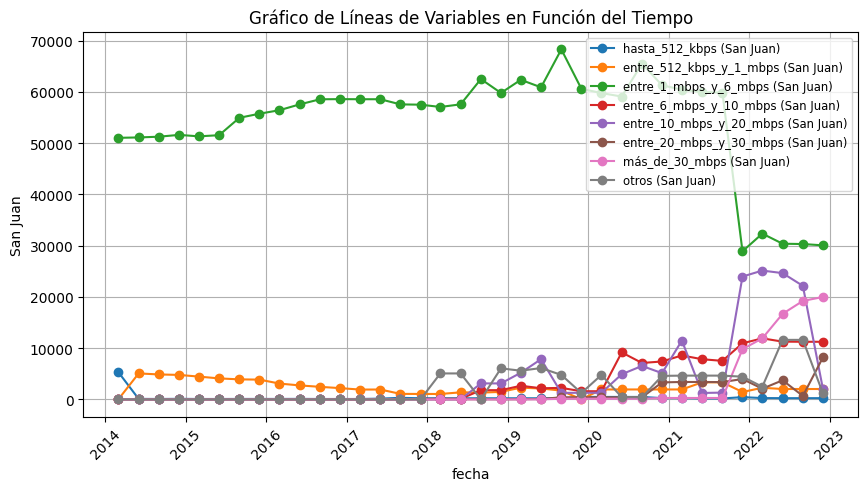

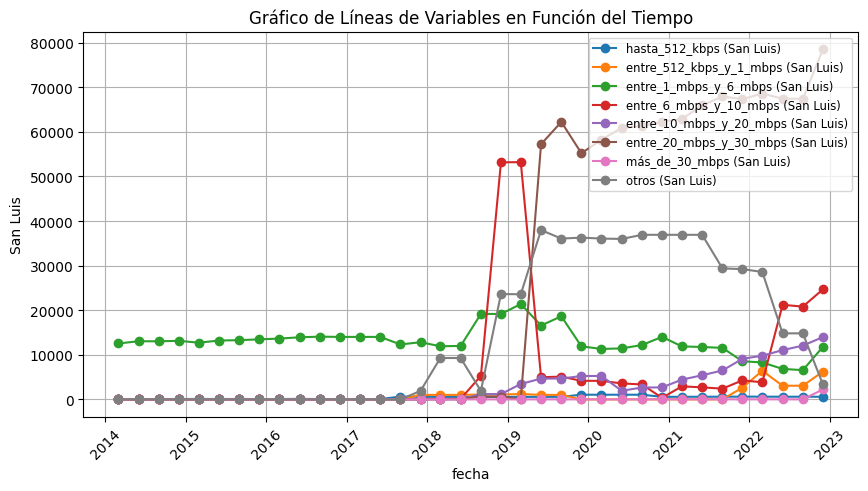

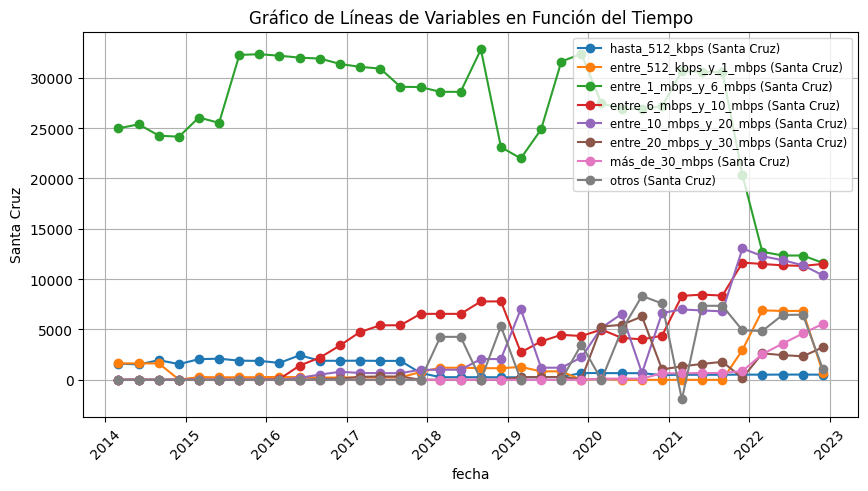

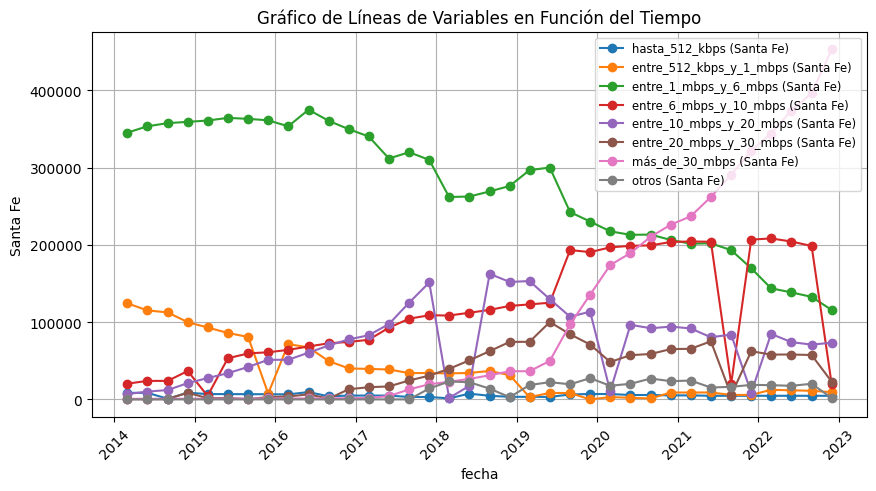

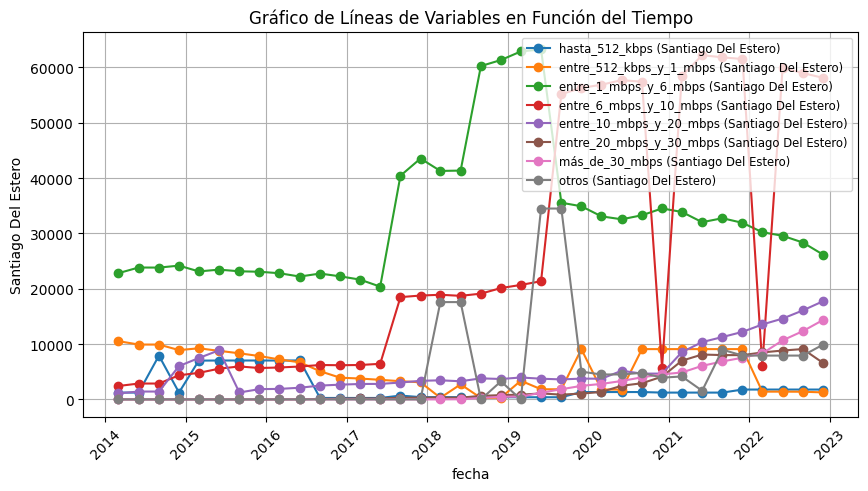

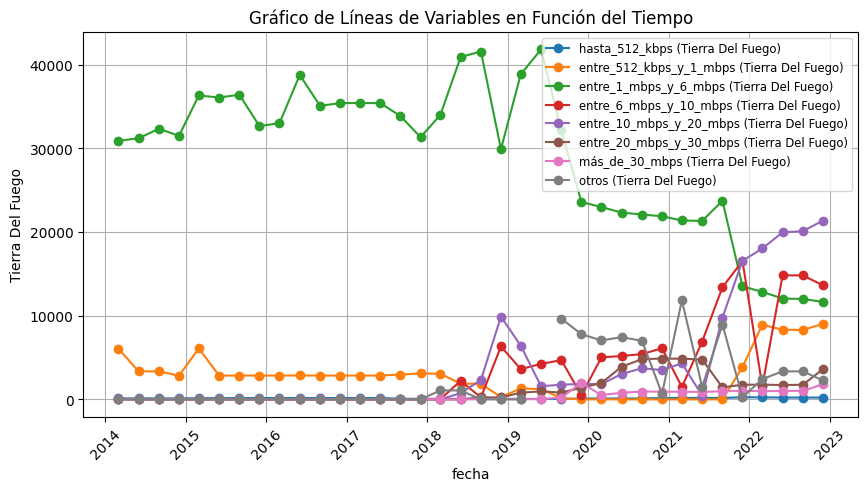

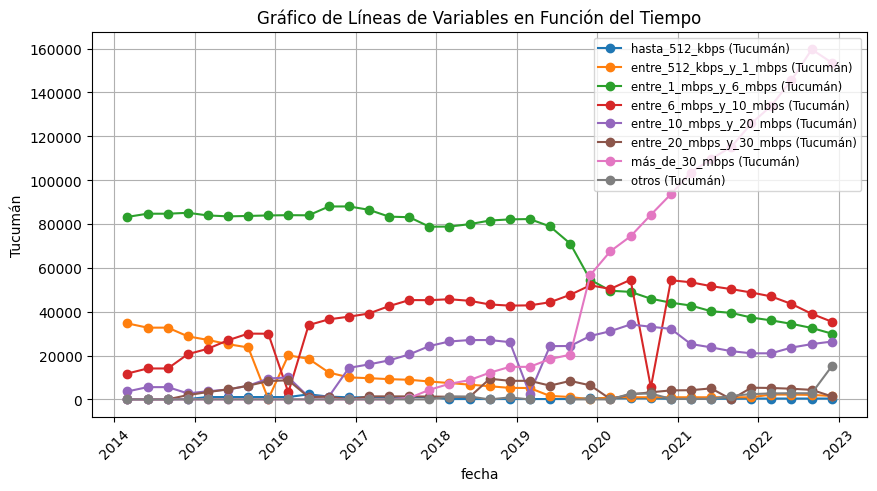

In [139]:
graficar_columnas_en_funcion_del_tiempo(df, valor_columna, velocidades)

In [132]:
df.to_csv('../csvPi/6_2_internet_accesos_por_velocidad_provincias.csv', index=False)